In [61]:
# Import libraries
import keras
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ('x_train.shape:', x_train.shape, ' y_train.shape: ', y_train.shape, ' x_test.shape: ', x_test.shape, ' y_test.shape: ', y_test.shape)

x_train.shape: (60000, 28, 28)  y_train.shape:  (60000,)  x_test.shape:  (10000, 28, 28)  y_test.shape:  (10000,)


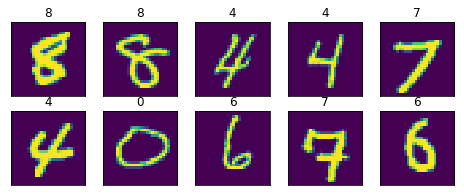

In [63]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    imageNumber = np.random.randint(x_train.shape[0])
    imageToPlot = x_train[imageNumber, ::].reshape(28,28)
    labelToPlot = y_train[imageNumber]
    title = str(labelToPlot)
    # print (labelToPlot)
    ax.set_title(title)
    plt.imshow(imageToPlot)
    
plt.show()

In [64]:
## Getting a subset of training & test samples. 
## If the sizes of training & test are small, this is not needed
predict_idx = np.random.randint(x_train.shape[0], size=20)
x_pred = x_train[predict_idx]
y_pred = y_train[predict_idx]
idx = np.random.randint(x_train.shape[0], size = 20000)
x_train = x_train[idx]
y_train = y_train[idx]
idx = np.random.randint(x_test.shape[0], size = 5000)
x_test = x_test[idx]
y_test = y_test[idx]

# Convert the dtype from uint to float32 since we need to divide by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test / 255

samples = x_train.shape[0]
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
features = 1
input_shape = (img_rows, img_cols, features)
num_classes = 10
batch_size=128
epochs=10

# Reshape the x & y train & test data.
x_train = x_train.reshape(samples, img_rows, img_cols, features)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, features)

# create one-hot encoded data with following:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [67]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [68]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.5128 - acc: 0.8399 - val_loss: 0.2365 - val_acc: 0.9316
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1630 - acc: 0.9501 - val_loss: 0.0868 - val_acc: 0.9686
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1070 - acc: 0.9678 - val_loss: 0.0813 - val_acc: 0.9762
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0858 - acc: 0.9747 - val_loss: 0.0700 - val_acc: 0.9782
Epoch 5/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.0713 - acc: 0.9777 - val_loss: 0.0571 - val_acc: 0.9816
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.0576 - acc: 0.9819 - val_loss: 0.0505 - val_acc: 0.9842
Epoch 7/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0503 - acc: 0.9835 - val_loss: 0.0515 - val_acc:

In [69]:
model.evaluate(x_test, y_test)

5000/5000 [==============================] - 5s 992us/step


[0.05926300503796665, 0.9826]

In [70]:
print ('x_train.shape:', x_train.shape, ' y_train.shape: ', y_train.shape, ' x_test.shape: ', x_test.shape, ' y_test.shape: ', y_test.shape)

x_train.shape: (20000, 28, 28, 1)  y_train.shape:  (20000, 10)  x_test.shape:  (5000, 28, 28, 1)  y_test.shape:  (5000, 10)


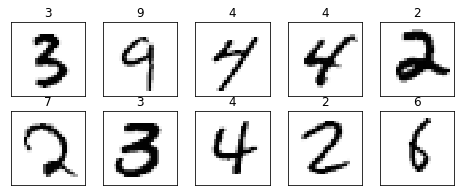

In [71]:
# print (x_pred.shape)

fig = plt.figure(figsize=(8,3))

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    imageNumber = i
    predictions = model.predict(x_pred[imageNumber].reshape(1, 28, 28, 1))
    imageToPlot = x_pred[imageNumber].reshape(28, 28)
    labelToPlot = predictions.argmax()
    # print (labelToPlot)
    title = str(labelToPlot)
    ax.set_title(title)
    plt.imshow(imageToPlot, cmap='Greys')

plt.show()

